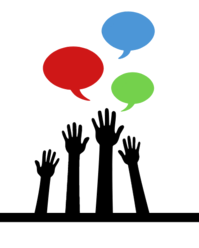

In [71]:
from IPython.display import Image
Image(filename="TSF.png")

# The spark Foundation 

## Task 01 - Prediction Using Supervised ML

### Author: Muhammad Shahbaz Muneer (Batch-may-21)

### Tasks to perform:

*1* Predict Student percentage based on the number of study hours using simple Linear Regrerssion 

*2* Predict the score of a student if the student studies for 9.25 hourse/day 

#  Importing libraries 

In [125]:
# for data handling and data manipulation 

import numpy as np 
import pandas as pd 

# for data visualization and conditional plotting 

import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 

# for statistical operations such as distributions 

import scipy.stats as stats
import statsmodels.formula.api as smf

# for model selection, training and evalution 

from sklearn import metrics 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 

## loading the data set 

In [126]:
df = pd.read_csv("http://bit.ly/w-data")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Exploratory Data Analysis 

In [127]:
df.info()                         # whole info about the nature of data  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [128]:
df.describe()                         # statistical information 

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [129]:
df.corr()                         # Tells us the relationship b/w Hours and Scores 

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


## Data Visualization 

D:\Anaconda setup\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


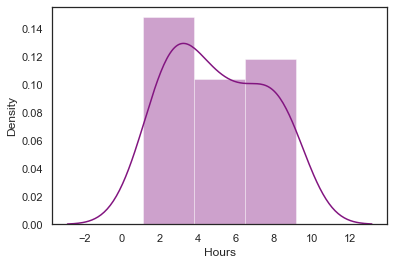

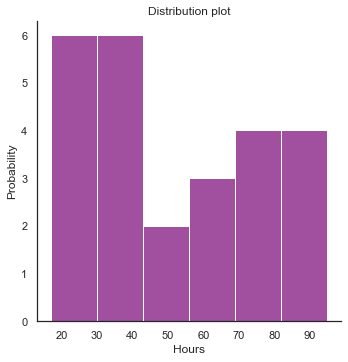

In [130]:
sns.set(style ="white", palette = "BuPu_r")
sns.distplot(df["Hours"])
sns.displot(df["Scores"],kind = "hist",rug=False)
plt.xlabel("Hours")
plt.ylabel("Probability")
plt.title("Distribution plot")
plt.show()                                       # for checking univariate data dsitribution

<AxesSubplot:>

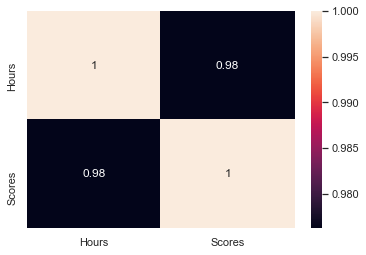

In [131]:
sns.heatmap(df.corr(),annot = True)      #checking normalize confusion matrix 

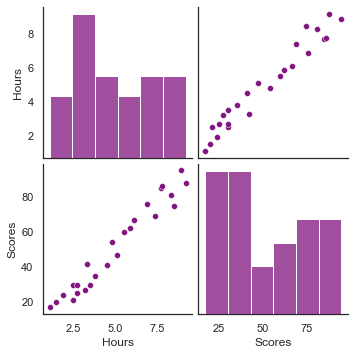

In [132]:
sns.pairplot(df)                     # using pairplot to check marginal distribution of the data in each column.

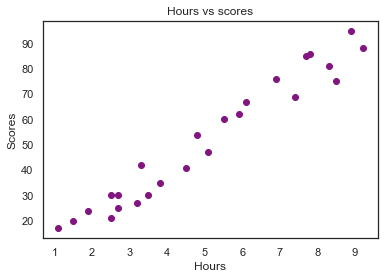

In [133]:
plt.scatter(df["Hours"],df["Scores"])      # for scatter plot
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Hours vs scores")
plt.show()

D:\Anaconda setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


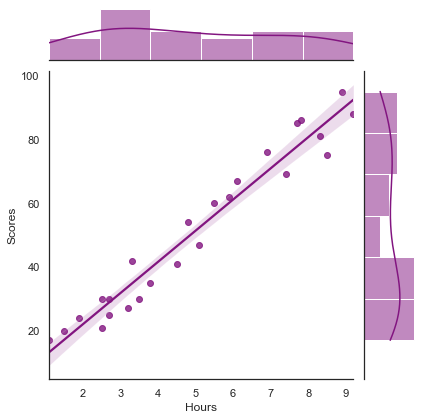

In [134]:
j = sns.jointplot(df["Hours"], df["Scores"], kind="reg")    # Visualizing correlation between variables 
plt.show()

## Training Model By Using Linear Regression 

### Dependent vs Independent variable

In [135]:
#Selecting Dependent and independent variables for the data set 

X = df.iloc[:,:-1].values    # for independent variable 
y = df.iloc[:,-1].values     # for dependent variable 


### Spliting into Train and Test 

In [136]:
# splitting selecting data set for training and testing 

X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size = 0.2 , random_state = 0) 

### Training Linear regression model 

In [137]:
reg = LinearRegression()        # fiting the model 
reg.fit(X_train, Y_train)

LinearRegression()

### Visualization of Training and Testing model

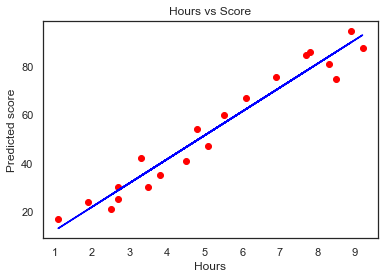

In [183]:
# visualization for training 

plt.scatter(X_train,Y_train,color = "red")   # actual data 
plt.plot(X_train,reg.predict(X_train), color = "blue") #predicted data   # here reg.predict included slope and intercept 
plt.title("Hours vs Score")
plt.xlabel("Hours")
plt.ylabel("Predicted score")
plt.show()

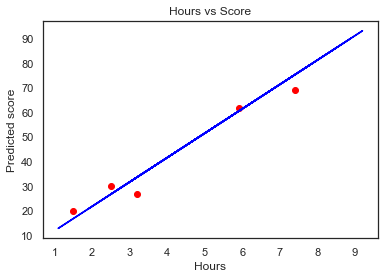

In [146]:
# visualization for testing 

plt.scatter(X_test,Y_test,color = "red")   # actual data 
plt.plot(X_train,reg.predict(X_train),color = "blue") #predicted data 
plt.title("Hours vs Score")
plt.xlabel("Hours")
plt.ylabel("Predicted score")
plt.show()

### comparing actual and predicting value of test_set

In [158]:
Y_pred = reg.predict(X_test)

df_compare = pd.DataFrame({"Actual_score": Y_test, "Predicted_score": Y_pred})
df_compare

,Actual_score,Predicted_score
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Model Evaluation 

In [159]:
print("Mean Absolute Error :", metrics.mean_absolute_error(Y_test, Y_pred))
print("Mean Squared Error :", metrics.mean_squared_error(Y_test, Y_pred))

Mean Absolute Error : 4.183859899002982
Mean Squared Error : 21.598769307217456


## Problem Statement
#### if the student studies 9.25 hours per day what will be his score?

In [171]:
hours = 9.25 
own_predict = reg.predict([[hours]])
print(f"if the student studies {hours}/day \nso our model says that the student scores will be {own_predict}")

if the student studies 9.25/day 
so our model says that the student scores will be [93.69173249]


# Thank you